# Praktikum 3 Intelligente Sensorsysteme
Tim Tiedemann, Thomas Lehmann, Tobias De Gasperis

Version 11.05.2023

# Einfache intelligente Sensoren und Datenvorverarbeitung
Im Praktikum 3 geht es um die Ermittlung von Eigenschaften einiger komplexerer Sensoren, sowie die Datenvorverarbeitung und die Feature-Erzeugung.

Lesen Sie sich die Aufgaben gut durch. Sollten Sie eine Aufgabe nicht lösen können, so beschreiben Sie zumindest, wie weit Sie gekommen sind und auf welche Weise Sie vorgegangen sind.

Beachten Sie auf der methodischen Seite, dass Sie die jeweiligen Ergebnisse Ihrer Analysen kommentieren. Alle Diagramme sind korrekt zu beschriften.

Die Aufgaben sind direkt hier als Protokoll zu bearbeiten. Das abgegebene Notebook soll ausführbar sein. Daneben ist der PDF-Export des Notebook mit abzugeben.

Autoren des Protokolls: Khanh Nhu Pham, Berivan Elmas

# Hintergrund
Aus den gesammelten Daten/Signalen kann man weitere Eigenschaften (Features) ableiten. Dazu müssen diese zum Teil erst geeignete vorverarbeitet werden, z.B. mit Filtern geglättet werden.

Im industriellen Umfeld kommen komplexere Sensorsysteme mit einer höheren Genauigkeit zum Einsatz. Die Integration und Inbetriebnahme ist oftmals nicht ganz klar, deshalb soll das exemplarisch ausprobiert werden und ein Vergleich zwischen Sensorsystemen vorgenommen werden.

Aus dem letzten Praktikum wurden Bewegungsdaten erfasst. Die Datenmenge ist für eine einfache Analyse zu umfangreich. Mit Hilfe der Principle Component Analysis (PCA) soll die Datendimension reduziert und die Ergebnisse interpretiert werden.

# Vorbereitungsaufgaben
## Komplexe Sensoren
Analysieren Sie die zugehörige Datenblätter und Handbücher (siehe Teams) für die Sensoren SensoPart FT 80 und Welotec OWTC1. Um was für Sensoren handelt es sich jeweils und welches Messprinzip wird verwendet? Über welche Schnittstellen bekommt man die Messwerte? Welche weiteren Daten könnten für die Praktikumsaufgabe relevant sein? Hinweis: Im Labor steht keine RS485-Schnittstelle zur Verfügung.

Für den Sensor Welotec OWTC1 benötigen Sie noch eine Folge von Kommandos, um laufende Messwerte auslesen zu können. Hierzu hilft Ihnen das Dokument zu dem Sensor “Welotec OWTC-1” in MS-Teams/EMIL weiter. Wie muss die Schnittstelle konfiguriert werden und welche Kommandos müssen Sie senden?

Als weiteres System wir im Praktikum der Joy-Pi-Koffer eingesetzt, welcher gleich sehr viele Sensoren beinhaltet. Verschaffen Sie sich einen ersten Überblick über diesen Aufbau. Welches Teilsystem ist für die Entfernungsmessung geeignet?

1. SensoPart FT 80 RLA-500-S1L8 
3. Welotec OWTC1
3. Koffer Joy-Pi von joy-it

**Sensorenanalyseergebnisse:**

*OWTC 1*
- Distanzmessgerät für die industrielle Anwendung
- führt kontaktlose Distanzmessungen aus, indem es die Reflektion des vom Modul ausgesandten Laserstrahls auswertet
- die Werte werden über die seriellen Schnittstellen RS-232 und RS-422 geliefert
- die Messfrequenz geht bis 6Hz und hat eine Genauigkeit von 1.5mm
- Baudrate von 19200
- je nach Konfiguration beträgt der Output 0-20mA oder 4-20mA
- Betriebsspannung von 9-30V
- statische Messsicherheit von 95.4%
- Messbereich von 0.05 bis 500m

    *Konfiguration*
    - Betriebsart (Automatic oder Controlled)
    - Konf.kommandos im Abschnitt 8.3
    

*FT 80*
- Distanzmessgerät für kurze Entfernungen
- führt Messungen nach Triangulationsprinzip aus über Auswertung der Position des Lasers aus dem Detektor des Moduls
- wird über serielle Schnittstelle RS-485 ausgelesen (Halbduplex)
    --> möglicherweise RS-232 mit Adapter anpassen?
- Messfrequenz von 2.5kHz
- Baudrate von 38400, 1 Selektionsbit und 7Daten-/Adressbit
- Output beträgt 4-20mA
- Betriebsspannung 18-30V
- Messgenauigkeit von 0.01% des Messbereichs
- misst im Bereich von 250-750mm

- (braucht 5min Aufwärmzeit für präzisere Messung)

*JOY-PI*
- Zur Distanzmessung wurde ein Ultraschallsensor verbaut

## Datensätze
Schliessen Sie die Aufnahme der Messdaten für die verschiedenen Bewegungen aus dem Praktikum 2 ab, damit Sie für die folgenden Aufgaben geeignete Daten mit 12 Dimensionen haben.

# Im Labor

## Datenvorverarbeitung und Feature-Generation
Erstellen Sie Python-Scripte für die Vorverarbeitung Ihrer Messdaten mittels Filter.

Verwenden Sie für die Anwendung eines Filters den Datensatz für das Bewegungsprofil 2 aus dem letzten Praktikum.

Filtern Sie die Daten von einem der Beschleunigungssenoren für alle drei Achsen mit jeweils einem IIR-Filter erster Ordnung (siehe Vorlesung); mindestens 1000 Samples. Implementieren Sie das Filter so, dass man es auch für einen Live-Betrieb (jeweils ein Sample pro Schleifendurchlauf) verwendet werden kann.

**Code**

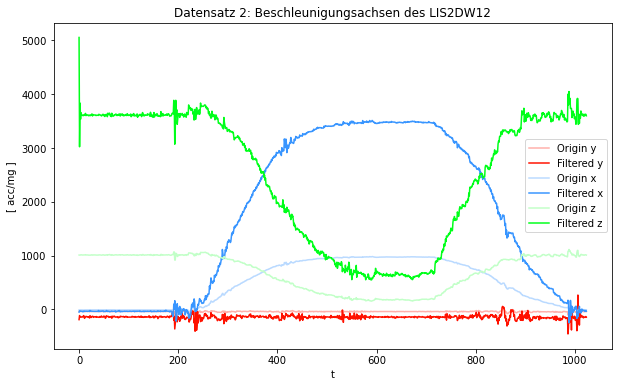

In [107]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(7,), skip_header=1)
data_y = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(8,), skip_header=1)
data_z = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(9,), skip_header=1)

# Größe des Eingangssignals ermitteln
len = data.shape[0]
b0 = 5.0
a1 = 0.4

def iir_filter(data, b0, a1):
    length = data.shape[0]
    g = np.zeros(length)
    xk1 = 0

    for i in range(length):
        s = data[i]
        xk1 = -a1 * xk1 + s
        g[i] = b0 * xk1

    return g
fil_x = iir_filter(data_x, b0, a1)
fil_y = iir_filter(data_y, b0, a1)
fil_z = iir_filter(data_z, b0, a1)

plt.figure(figsize=(10, 6))
plt.plot(data_y, color='#ffb0ab', label='Origin y')
plt.plot(fil_y, color='#ff1100', label='Filtered y')

plt.plot(data_x, color='#badaff', label='Origin x')
plt.plot(fil_x, color='#3895ff', label='Filtered x')

plt.plot(data_z, color='#c2ffc8', label='Origin z')
plt.plot(fil_z, color='#00ff1a', label='Filtered z')

plt.title("Datensatz 2: Beschleunigungsachsen des LIS2DW12")
plt.xlabel("t")
plt.ylabel("[ acc/mg ]")
plt.legend()
plt.show()


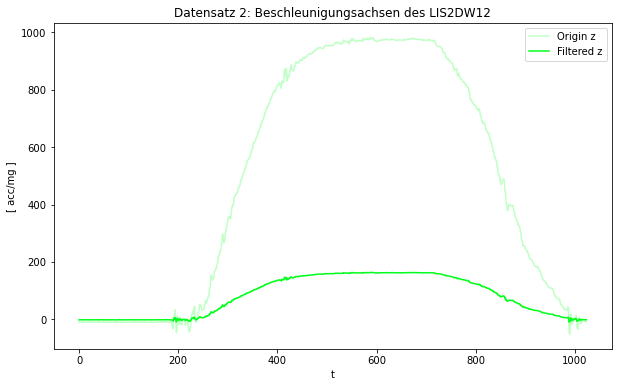

In [114]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

data_x = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(7,), skip_header=1)
data_y = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(8,), skip_header=1)
data_z = np.genfromtxt("Datensatz2.csv", delimiter=";", usecols=(9,), skip_header=1)

order = 1  # Filter order
cutoff_freq = 100  # Cutoff frequency in Hz
sampling_freq = 1000  # Sampling frequency in Hz

nyquist_freq = 0.5 * sampling_freq  # Nyquist frequency
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = signal.iirfilter(order, normalized_cutoff_freq, btype='lowpass', analog=True, ftype='butter')
filtered_signal = signal.lfilter(b, a, data_x)

plt.figure(figsize=(10, 6))
plt.plot(data_x, color='#c2ffc8', label='Origin z')
plt.plot(filtered_signal, color='#00ff1a', label='Filtered z')

plt.title("Datensatz 2: Beschleunigungsachsen des LIS2DW12")
plt.xlabel("t")
plt.ylabel("[ acc/mg ]")
plt.legend()
plt.show()

Stellen Sie auch die sich ergebenden gefilterten Daten über die Zeit in Sekunden dar. Der Bereich darf auf einen relevanten Bereich beschränkt werden.

Welchen Faktor wählen Sie für $\alpha$? Warum haben Sie diesen Wert von $\alpha$ gewählt?

**Parameterwahl:**

Welche algorithmische Komplexität/ungefähre Komplexität in Floating-Point-Operations hat Ihre Filterfunktion?

**Berechnungsaufwand**

## Komplexe intelligente Sensoren
Es sind im Labor ggf. nicht alle Sensorsysteme verfügbar, da diese auch in Forschungsprojekten verwendet werden. Die Ausgabe eines Sensors erfolgt erst, wenn ausreichend Kenntnisstand über das Vorgehen bei der Inbetriebnahme vorhanden ist.

Bestimmen Sie exemplarisch mit den Sensoren Entfernungen und vergleichen Sie diese mit einer Referenzmessung.

### Senso Part
Versuchen Sie (in Absprache mit dem Tutor), den Sensor in Betrieb zu nehmen. Welche Optionen der Messwertausgabe verwenden Sie?

??
- Es wurden Pin 6 und Pin 8 verwendet, die Spannungswerte wurden über das Oszilloskop ausgelesen

|Distanz in cm|Messwert in V|
|-------------|---------------|
25| 1,98
35| 1,65
45| 1,32
55| 0,991
65| 0,672
75| 0,374


**Datensatz zusammen gemessen: Elmas Berivan, Khanh Nhu Pham, Jonas Wiebers**

### Welotec
Versuchen Sie (in Absprache mit dem Tutor), den Sensor in Betrieb zu nehmen.

|Distanz in cm|Messwert in cm|
|-------------|---------------|
25| 25,36
35| 35,01
45| 44,67
55| 55,31
65| 65,33
75| 75,31

**Datensatz zusammen gemessen: Elmas Berivan, Khanh Nhu Pham, Jonas Wiebers**

### Joy-Pi-System

Versuchen Sie (in Absprache mit dem Tutor), den Aufbau in Betrieb zu nehmen. Öffnen Sie ein Terminal und schauen Sie sich die Dateien unter `/Desktop/Joy-Pi/` an. Testen Sie das Script `distance.py`. Schauen Sie sich das Script an und versuchen Sie, die einzelnen Schritte nachzuvollziehen. Kopieren Sie ggf. das Script in eine eigene Datei `distance_NAME_DATUM.py` und nehmen Sie darin Änderungen vor, um das Verhalten besser verstehen zu können. Erklären Sie die Funktionsweise der durchgeführten Messung:


### Vergleichsmessung von Sensorsystemen
Versuchen Sie, in einem Aufbau den zuletzt genutzten Sensor aus dem Joy-Pi-System und einen der anderen Sensoren parallel zu betreiben. Was ergeben die Messungen des einen und des anderen Sensors bei gleicher Objektentfernung?

- siehe oben angegebene Tabellen

### Vergleich der Sensoren über Kenndaten

Vergleichen Sie die Leistungsdaten der Distanzsensoren, z.B. in einer Tabelle. Nehmen Sie hierzu auch den Entfernungsmesser mit auf, den Sie im ersten Praktikumsversuch untersucht haben. Bewerten Sie kurz die Sensoren.

|Sharp GP2Y0A21|SensoPart FT 80|Welotec OWTC1|Joy-Pi|
|-|-|-|-|


## Dimensionsreduktion

Im Praktikum 2 haben Sie Daten von einem Sensorsystem mit 12 Dimensionen aufgenommen. Für die Erkennung der Bewegungsprofile sind evtl. nicht alle Dimensionen relevant. Mit Hilfe der PCA sollen Sie die relvanten Dimensionen/Features identifizieren.

In dieser Analyse sollen zunächst nur die Datensätze verwendet werden, bei denen das System auf dem Tisch liegend bewegt wurde. 

Führen Sie für die Datensätze (4-6) jeweils die Hauptkomponentenanalyse (PCA) mit Python durch. Hierzu können Sie Funktionen aus dem Paket `numpy` verwenden oder direkt die Klasse PCA aus dem Paket `scikit`.


    # numpy     
    x  = np.array(data)  
    x_ = x - x.mean(axis=) 
    r = np.cov(x_.T)
    #print 'r =', r     
    evals, evecs = np.linalg.eig(r)     
    print(evals, evecs)     
    pca_score = np.matmul(x_, evecs)                 

     # Scikit
     # Dim festlegen: pca = PCA(n_components=3)
     # sonst besser so:
     pca = PCA()
     pca.fit(x)
     pca_ratio = pca.explained_variance_ratio_
     eigVec = pca.components_
     pca_score = pca.transform(x)

Achtung: Je nach verwendeter Bibliothek wird keine Eigenwertzerlegung sondern eine Singulärwertzerlegung durchgeführt. Wenn im folgenden von “Eigenwert” die Rede ist, können Sie stattdessen die “erklärte Varianz” (absolut oder relativ) verwenden.

Wählen Sie je einen Datensatz mit einer einfachen (linearen) und einen mit einer komplexen Bewegung aus. Erstellen Sie für beide Datensätze jeweils den Scree-Plot der Eigenwerte (oder der erklärten Varianz, je nach verwendetem Verfahren) als Ergebnis einer PCA auf den Datensätzen. Kann man irgendeine Aussage auf Grund der Plots im Vergleich zu dem Bewegungsmuster machen?

Wählen Sie nun einen Datensatz für die weitere Bearbeitung aus. Vergleichen Sie bei dem Datensatz den Scree-Plots der "erklärten Varianz" mit und ohne Normalisierung: Erscheint für Sie eine Normalisierung sinnvoll? Wenn ja: in welcher Form?
Welche Normalisierung haben Sie aus welchem Grund gewählt?


Verwenden Sie dieselbe Art von Normalisierung, oder eben keine, bei den ausgewählten Datensätzen und stellen Sie den Score-Plot dar. Stellen Sie den Score auch auf der Zeitachse dar. Können Sie die Bewegungsabschnitte zuordnen? Gibt es Ähnlichkeiten zu den rohen Sensordaten? 

Wieso werden nicht alle 12 Dimensionen benötigt? Haben Sie eine Vermutung? Bedenken Sie, wie der Datensatz zu Stande gekommen ist: Wie hatten Sie das Sensor-Board bewegt? In welchem Bereich variierten die jeweils drei Dimensionen der Beschleunigung, der Winkelgeschwindigkeit und die Ausrichtung des Magnetfeldes? Betrachten Sie ggf. auch die Loadings aus den Eigenvektoren bei der Begründung.